# Cleaning Data

In [285]:
##Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# read excel file 
df = pd.read_excel("data/masterlistdatacopy.xlsx")

# delete rows with nan values
df.dropna(how='all', inplace=True) 

# Fill NaN values in the TASK column 
df['TASK'] = df['TASK'].interpolate(method ='pad', limit_direction ='forward')

# to find the dates in the TASK column
dates_in_task_col = df['TASK'].str.contains('---')

# to get indexes of the dates in the TASK column
get_idx = dates_in_task_col[dates_in_task_col == True].index 

# Fill NaN values by copying the dates in the TASK column to DATE column
df['DATE'] = df['TASK'].loc[get_idx].interpolate()

# Fill NaN values in the DATE column
df['DATE'] = df['DATE'].interpolate(method ='pad', limit_direction ='forward')

# delete if any row include nan values
df.dropna(how='any',axis=0, inplace=True)

##  fix typs of dates ##

# delete ' - ' s in 'DATE' columnn
df['DATE'] = df['DATE'].str.strip(' - ')
# delete unnecessary emojies
df['TASK'] = df['TASK'].str.strip(' 📖|📈|📚|✍️|👂|🗣')
# **** #

# find values containing'2022' in DATE column
findY = df['DATE'].str.contains('2022')

# get indexes that are not containing'2022'
getFalse = findY[findY == False].index

# format dates
a = pd.to_datetime(df['DATE'].loc[getFalse], format='%d %B %a')+ pd.offsets.DateOffset(years=123) # this is because formating returns years as 1900 so it adds 123 years to the default value

# update data
df['DATE'].update(a)

# **** #

# get indexes containing'2022'
getTrue = findY[findY == True].index 

# format dates
b =  pd.to_datetime(df['DATE'].loc[getTrue], format='%d %b %Y %a')

# update data
df['DATE'].update(b)

# **** #

# show only dates not times
df['DATE'] = pd.to_datetime(df['DATE']).dt.date 

df.head(10)

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED
3,2023-01-22,first draft,03:00:00,15:35:00,16:00:00,25.0,✅
4,2023-01-22,first draft,02:00:00,15:10:00,15:35:00,25.0,✅
5,2023-01-22,first draft,01:00:00,14:09:00,14:46:00,25.0,✅
11,2023-01-21,web,02:00:00,01:44:00,02:04:00,19.0,❌
12,2023-01-21,web,01:00:00,01:19:00,01:44:00,25.0,✅
18,2023-01-19,Eng,01:00:00,11:02:00,13:01:00,25.0,✅
24,2023-01-18,Eng,01:00:00,17:57:00,18:03:00,6.0,❌
30,2023-01-17,Math 111,11:00:00,12:21:00,12:46:00,25.0,✅
31,2023-01-17,Math 111,10:00:00,11:56:00,12:21:00,25.0,✅
32,2023-01-17,Math 111,09:00:00,11:30:00,11:54:00,25.0,✅


In [286]:
df_copy = df.copy()

df_copy.loc[df_copy['TASK'].str.contains('Ch|ch|CH'), 'TASK'] = 'PHYS 111'
df_copy.loc[df_copy['TASK'].str.contains('153'), 'TASK'] = 'MATH 153'
df_copy.loc[df_copy['TASK'].str.contains('April|March|February|Revision|Eng'), 'TASK'] = 'Eng revision'
df_copy.loc[df_copy['TASK'].str.contains('Py'), 'TASK'] = 'Python'
df_copy.loc[df_copy['TASK'].str.contains('学习中文'), 'TASK'] = 'Chinese'
time_spent = df_copy.groupby(['TASK']).sum()
time_spent.sort_values(by=['TIME FOCUSED'], ascending= False).head(10)

,TIME FOCUSED
TASK,
PHYS 111,8384.0
React,7566.0
MATH 153,6653.0
firebase,6501.0
Javascript,4301.0
Math 111,3861.0
rebuidling,2701.0
Eng revision,2080.0
Chinese,2060.0


In [287]:
checklist = pd.Series(['MATH', 'PHYS','IELTS','English',
               'Drone Simulation','Habbits & Hobbies',
               '中国','game - JavaScript','College Admission', 
               'Chess-Like Game', 'Python Programming','Volunteer Works'])
checklist

0                   MATH
1                   PHYS
2                  IELTS
3                English
4       Drone Simulation
5      Habbits & Hobbies
6                     中国
7      game - JavaScript
8      College Admission
9        Chess-Like Game
10    Python Programming
11       Volunteer Works
dtype: object

In [288]:
df_copy['CHECKLIST'] = np.nan
df_copy

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED,CHECKLIST
3,2023-01-22,first draft,03:00:00,15:35:00,16:00:00,25.0,✅,NaN
4,2023-01-22,first draft,02:00:00,15:10:00,15:35:00,25.0,✅,NaN
5,2023-01-22,first draft,01:00:00,14:09:00,14:46:00,25.0,✅,NaN
11,2023-01-21,web,02:00:00,01:44:00,02:04:00,19.0,❌,NaN
12,2023-01-21,web,01:00:00,01:19:00,01:44:00,25.0,✅,NaN
...,...,...,...,...,...,...,...,...
6408,2022-02-28,PHYS 111,05:00:00,08:28:00,08:53:00,25.0,✅,NaN
6412,2022-02-28,Workshop,04:00:00,06:43:00,07:08:00,25.0,✅,NaN
6416,2022-02-28,IELTS,03:00:00,05:42:00,06:07:00,25.0,✅,NaN
6417,2022-02-28,IELTS,02:00:00,05:05:00,05:30:00,25.0,✅,NaN


In [289]:
df_copy.loc[df_copy['TASK'].str.contains('Py|Numpy|Academy'), 'CHECKLIST'] = checklist[10]


In [290]:
data = df_copy[['TIME FOCUSED', 'TASK', 'DATE']].copy()

# convert the DATE column to Timestamp objects
data['DATE'] = pd.to_datetime(data['DATE'],format='%Y %m %d ')

# Filter the dataframe by the desired date range
start_date = pd.Timestamp(input(str("type the start date like 2022-11-10 this format: "))or '2022-02-28')
end_date = pd.Timestamp(input(str("type the end date like 2023-01-10 this format: "))or '2023-01-22')
data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]
strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')

# Pie Chart 

## Create Data for Pie Chart 

In [291]:
pie_df = data
# Group the data by task and sum the time focused
pie_df = pie_df.groupby('TASK')['TIME FOCUSED'].sum().reset_index()
pie_df =  pie_df.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()



## Seaborn & matplotlib.pyplot codes

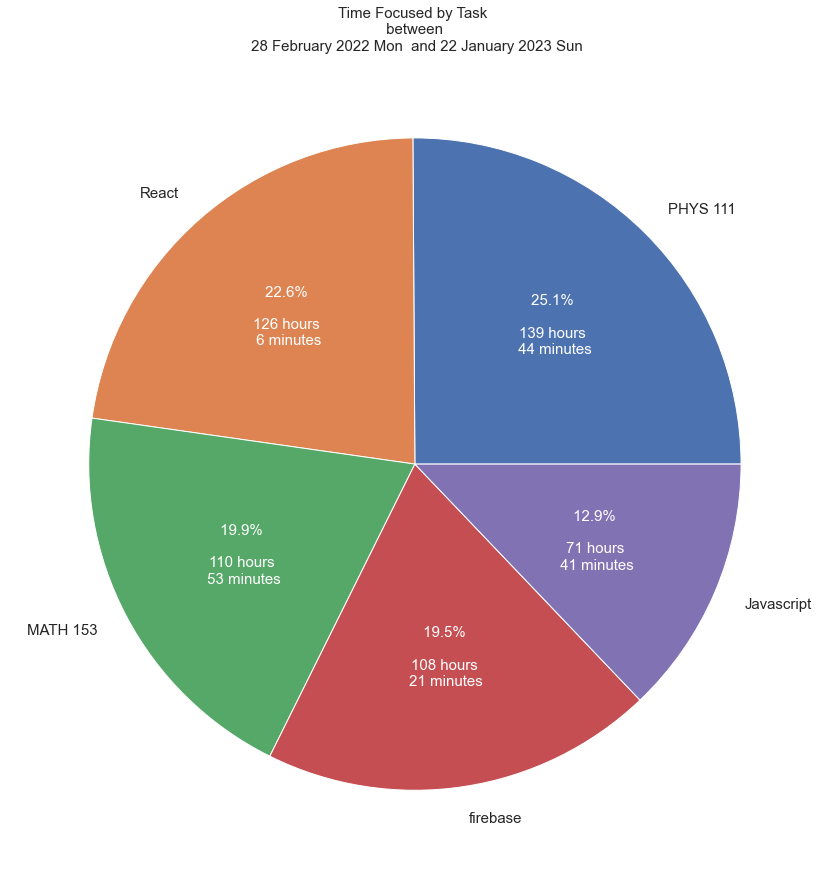

In [292]:
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(pie_df['TIME FOCUSED'], 
                                 labels=pie_df['TASK'], 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = pie_df['TIME FOCUSED'].sum()
for index, row in pie_df.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['TASK']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Time Focused by Task \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)


plt.show()

# Time focused by date 

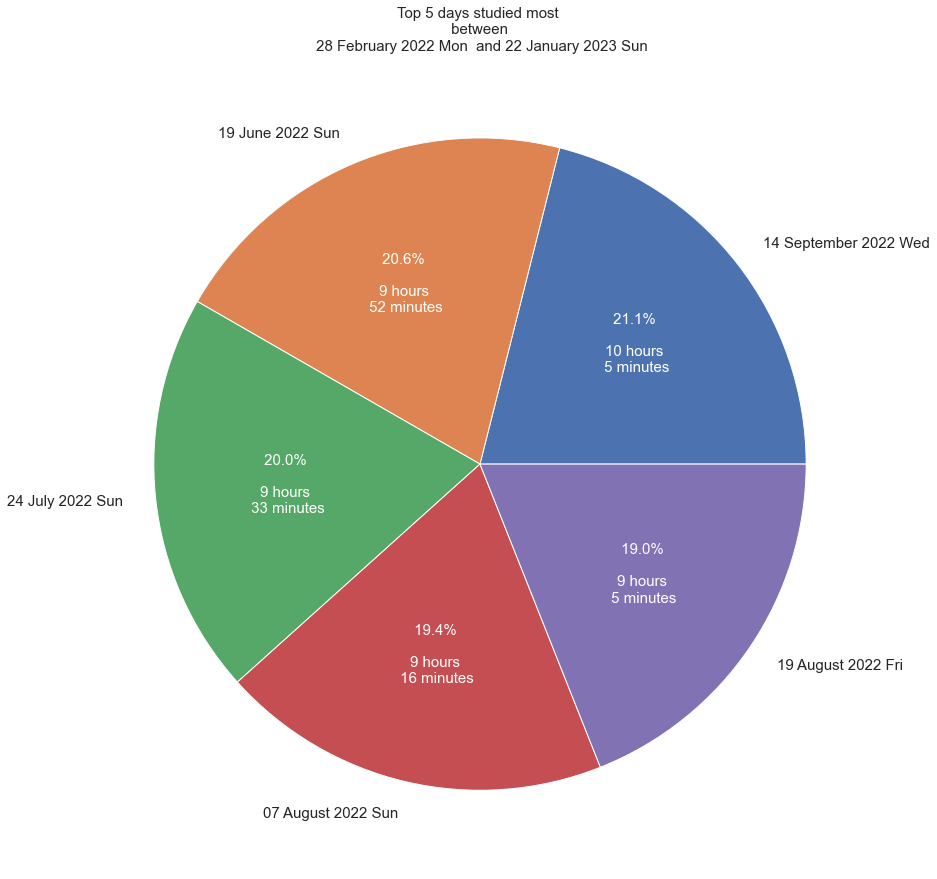

In [293]:
sort_date = data
# Group the data by task and sum the time focused
sort_date = sort_date.groupby('DATE')['TIME FOCUSED'].sum().reset_index()
sort_date =  sort_date.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()
# sort the dataframe by Time Focused in descending order


    
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(sort_date['TIME FOCUSED'], 
                                 labels=sort_date['DATE'].dt.strftime('%d %B %Y %a') , 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = sort_date['TIME FOCUSED'].sum()
for index, row in sort_date.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['DATE']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Top 5 days studied most \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)


plt.show()

### MultiIndex

In [294]:
grpdf = data
grpdf = grpdf.groupby(['DATE','TASK'])['TIME FOCUSED'].sum().reset_index()

dates = grpdf['DATE']
tasks = grpdf['TASK']
times = grpdf['TIME FOCUSED'].values

arrays= [
    dates.to_numpy(),
    tasks.to_numpy(),
        ]
index = pd.MultiIndex.from_arrays(arrays,
                                  names=["date","task"])
dtf = pd.Series(times,index=index)


Unstack

In [295]:
unstacked_df = dtf.unstack()

unstacked_df =unstacked_df.fillna(0)


## seaborn bar chart


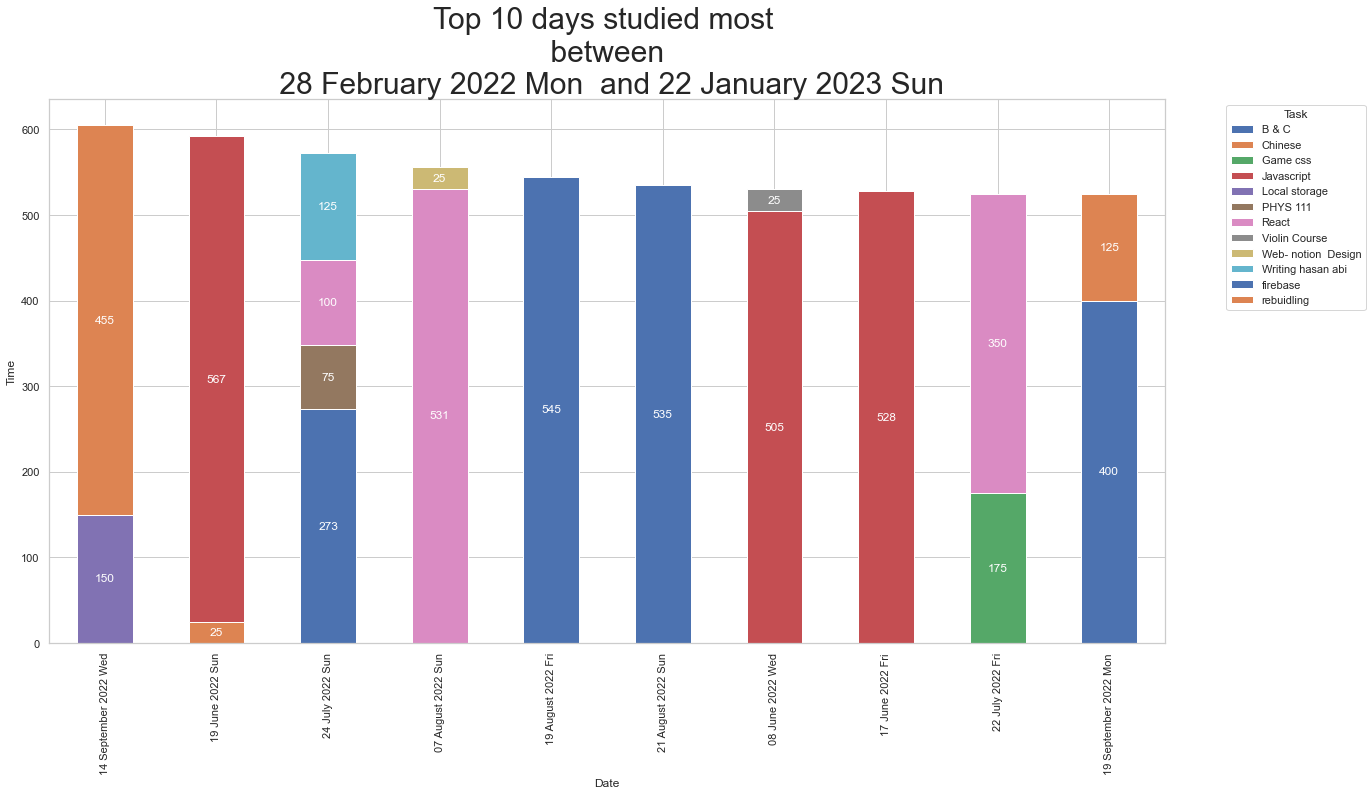

In [296]:

sns_df = unstacked_df
top_days = input() or 10

max_dates = sns_df.sum(axis=1).nlargest(top_days).index
get_max = sns_df.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
get_max.index = get_max.index.strftime('%d %B %Y %a')
sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(20, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = f"{patch.get_height():.0f}"
    if patch.get_height() != 0:
        ax.text(x, y, value, ha='center', va='center', color='white')
ax.set_title(f"Top {len(max_dates)} days studied most \n between \n {strf_start_date}  and {strf_end_date}",fontsize=30)

plt.show()


add column 


In [297]:

unstacked_df['total'] =  unstacked_df.sum(axis=1)

cols = unstacked_df.columns.tolist()

cols = [cols[-1]] + cols[:-1]
unstacked_df = unstacked_df[cols]
unstacked_df.head(30)
unstacked_df = unstacked_df.groupby(['total time'],
                                  level='date').sum()
unstacked_df= unstacked_df.sort_values(by='total',
                                       ascending= False ).reset_index().head(5)
unstacked_df

task,date,total,A weird problem ..,B & C,Bootstrap,CS885,Chinese,Data analysis,Deneme öğrenme,Documantation,...,last day bc,lesson student,medicine course,numberga.me,odtü,program,rebuidling,video career,violin,web
0,2022-09-14,605.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0.0,0.0
1,2022-06-19,592.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-24,573.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-08-07,556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-08-19,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## classifying by day name 


In [298]:
days_df = data 
days_df['DATE'] = days_df['DATE'].dt.day_name()


In [299]:
days_df= days_df.groupby(['DATE','TASK'])['TIME FOCUSED'].sum()

In [300]:
days_df.head(10)

DATE    TASK                          
Friday  B & C                              313.0
        Chinese                            425.0
        Eng revision                       175.0
        Game css                           175.0
        General                             25.0
        HTML, CSS, Flexbox & Bootstrap     125.0
        IELTS                               85.0
        Javascript                         728.0
        MATH 115                           100.0
        MATH 153                          1129.0
Name: TIME FOCUSED, dtype: float64

In [301]:
days_sns = days_df.unstack().fillna(0)

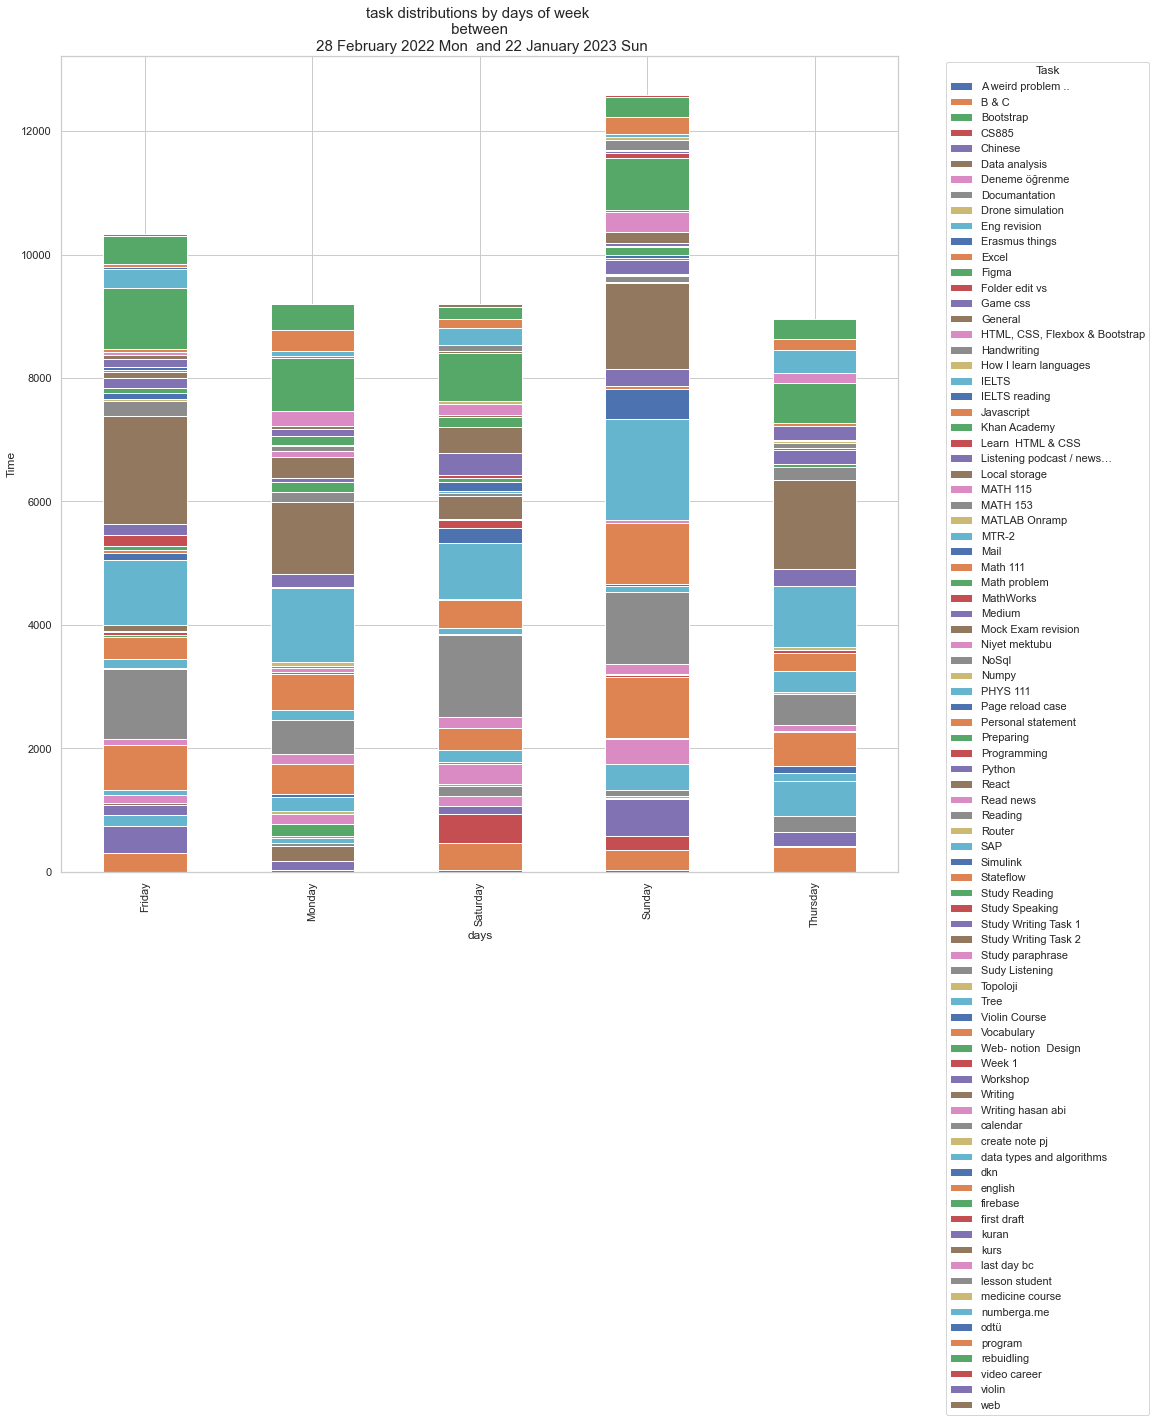

In [302]:
max_dates = days_sns.sum(axis=1).index

get_max = days_sns.loc[max_dates]

# get nonzero columns
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
#get_max.index = get_max.index.strftime('%d %B %Y %a')

sns.set(style='whitegrid')

ax = get_max.head(5).plot(kind='bar', stacked=True, figsize=(15, 15))
ax.set_xlabel('days')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on each bar
# for patch in ax.patches:
#     x = patch.get_x() + patch.get_width() / 2
#     y = patch.get_y() + patch.get_height() / 2
#     value = f"{patch.get_height():.0f}"
#     if patch.get_height() != 0:
#         ax.text( x,y, value, ha='center', va='center', color='white')

ax.set_title(f"task distributions by days of week \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)
# Show the plot
plt.show()